## This notebook iterates throught each session and computes the dominant frequency of each trial

### Data will be saved as a model to run stats and plotting

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

from scipy.io import loadmat
from scipy import ndimage
from scipy import stats 

import mne
from mne.time_frequency import tfr_array_multitaper, psd_array_multitaper
import pickle

from statsmodels.formula.api import ols, mixedlm
import statsmodels.api as sm

# Util functions for signal processing

In [3]:
"""
This cell contains useful functions to analyse the data
"""
def smooth_psd(p, sz=40, sigma=10):
    '''
    sz :  length of gaussFilter vector
    sigma = 10
    '''
    x = np.linspace(-sz / 2, sz / 2, sz);
    gaussFilter = np.exp(-x** 2 / (2 * sigma**2));
    gaussFilter = gaussFilter / sum (gaussFilter); # normalize
    pp = np.convolve(p, gaussFilter, 'same');
    return pp

# Load study related info

In [4]:
## Load study related info
with open('../Results/study_info.pickle', 'rb') as handle:
    study_info = pickle.load(handle,encoding='latin1')
    

density        = study_info['density'] 
speed          = study_info['speed'] 
dd             = study_info['dd'] ## Number of sensory cues (density)
dur            = study_info['dur'] ## Trial duration (sec)
K_i_idx        = study_info['K_i_idx']
K_i            = study_info['K_i']
uni            = study_info['uni']
t_dur          = study_info['t_dur']
t_dd           = study_info['t_dd']
sessions       = study_info['sessions'] 
ttl_idx        = study_info['ttl_idx']
hpc_electrodes = study_info['hpc_electrodes']
fs = study_info['fs']



## Load trial markers for each session
with open('../Results/trials_markers.pickle', 'rb') as handle:
    trials_markers = pickle.load(handle,encoding='latin1')

# Compute psd_multitaper per subject / trial / electrode 
### Be patient... it takes a while to compute (around 10 min)

In [254]:
# log_welch_0_1500_4_28_15_2

trial_begin           = 0
trial_end             = 1500
filter_data_low_freq  = 4
filter_data_high_freq = 28
smooth_psd_sz         = 15
smooth_psd_sigma      = 2

## Trial type
tmp_density = np.tile( np.repeat( np.arange(3), 3 ),3)
tmp_speed = np.tile( np.arange(3), 9 )
tmp_dur = [ 18.1, 13.5, 11]
tmp_dd = [50,100,150]

log_welch = []
for sub in range(len(sessions)):

    lfp = loadmat('../Data/'+sessions[sub]+'.mat')
    lfp = lfp['ourData']
    idx_trials = trials_markers[sessions[sub]]

    tmp_welch = []
    for cc in hpc_electrodes[sub]:
        
        lfp[cc] = mne.filter.notch_filter( np.float64(lfp[cc]), fs, [50,100,150,200], notch_widths=20 )

        for trial in range(len(idx_trials)):

            tmp_lfp = lfp[cc][ idx_trials[trial] + trial_begin : idx_trials[trial] + trial_end ]
            tmp_lfp_bbp = mne.filter.filter_data(  np.float64(tmp_lfp) , fs, filter_data_low_freq, filter_data_high_freq)
            p,f = psd_array_multitaper( tmp_lfp, fs, fmin=3.5, fmax=8.5)
            p = smooth_psd(p, sz=smooth_psd_sz, sigma=smooth_psd_sigma)
            max_p = np.argmax( p )
            tmp_welch.append( [cc, tmp_density[trial], tmp_speed[trial], tmp_dd[tmp_density[trial]]/tmp_dur[tmp_speed[trial]] , f[max_p] ] )

    log_welch.append(tmp_welch)

log_welch = np.array(log_welch)



## Now save it
filename = '../Results/log_welch' +'_'+ str(trial_begin) +'_'+ str(trial_end) +'_'+ str(filter_data_low_freq) +'_'+ str(filter_data_high_freq) +'_'+ str(smooth_psd_sz) +'_'+  str(smooth_psd_sigma)
np.save(filename, log_welch)

Setting up band-stop filter
Filter length of 3379 samples (6.600 sec) selected
Setting up band-pass filter from 4 - 28 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 7.0 Hz
Filter length of 845 samples (1.650 sec) selected
    Using multitaper spectrum estimation with 7 DPSS windows
Setting up band-pass filter from 4 - 28 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 7.0 Hz
Filter length of 845 samples (1.650 sec) selected
    Using multitaper spectrum estimation with 7 DPSS windows
Setting up band-pass filter from 4 - 28 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 7.0 Hz
Filter length of 845 samples (1.650 sec) selected
    Using multitaper spectrum estimation with 7 DPSS windows
Setting up band-pass filter from 4 - 28 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 7.0 Hz
Filter length of 845 samples (1.650 sec) selected
    Using multitaper spectrum estimation with 7 DPSS windows
S

Setting up band-pass filter from 4 - 28 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 7.0 Hz
Filter length of 845 samples (1.650 sec) selected
    Using multitaper spectrum estimation with 7 DPSS windows
Setting up band-pass filter from 4 - 28 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 7.0 Hz
Filter length of 845 samples (1.650 sec) selected
    Using multitaper spectrum estimation with 7 DPSS windows
Setting up band-pass filter from 4 - 28 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 7.0 Hz
Filter length of 845 samples (1.650 sec) selected
    Using multitaper spectrum estimation with 7 DPSS windows
Setting up band-pass filter from 4 - 28 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 7.0 Hz
Filter length of 845 samples (1.650 sec) selected
    Using multitaper spectrum estimation with 7 DPSS windows
Setting up band-pass filter from 4 - 28 Hz
l_trans_bandwidth chosen to be 2.0 Hz

h_trans_bandwidth chosen to be 7.0 Hz
Filter length of 845 samples (1.650 sec) selected
    Using multitaper spectrum estimation with 7 DPSS windows
Setting up band-pass filter from 4 - 28 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 7.0 Hz
Filter length of 845 samples (1.650 sec) selected
    Using multitaper spectrum estimation with 7 DPSS windows
Setting up band-pass filter from 4 - 28 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 7.0 Hz
Filter length of 845 samples (1.650 sec) selected
    Using multitaper spectrum estimation with 7 DPSS windows
Setting up band-pass filter from 4 - 28 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 7.0 Hz
Filter length of 845 samples (1.650 sec) selected
    Using multitaper spectrum estimation with 7 DPSS windows
Setting up band-pass filter from 4 - 28 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 7.0 Hz
Filter length of 845 samples (1.650 sec) s

    Using multitaper spectrum estimation with 7 DPSS windows
Setting up band-pass filter from 4 - 28 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 7.0 Hz
Filter length of 845 samples (1.650 sec) selected
    Using multitaper spectrum estimation with 7 DPSS windows
Setting up band-pass filter from 4 - 28 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 7.0 Hz
Filter length of 845 samples (1.650 sec) selected
    Using multitaper spectrum estimation with 7 DPSS windows
Setting up band-stop filter
Filter length of 3379 samples (6.600 sec) selected
Setting up band-pass filter from 4 - 28 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 7.0 Hz
Filter length of 845 samples (1.650 sec) selected
    Using multitaper spectrum estimation with 7 DPSS windows
Setting up band-pass filter from 4 - 28 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 7.0 Hz
Filter length of 845 samples (1.650 sec) selected
 

    Using multitaper spectrum estimation with 7 DPSS windows
Setting up band-pass filter from 4 - 28 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 7.0 Hz
Filter length of 845 samples (1.650 sec) selected
    Using multitaper spectrum estimation with 7 DPSS windows
Setting up band-pass filter from 4 - 28 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 7.0 Hz
Filter length of 845 samples (1.650 sec) selected
    Using multitaper spectrum estimation with 7 DPSS windows
Setting up band-pass filter from 4 - 28 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 7.0 Hz
Filter length of 845 samples (1.650 sec) selected
    Using multitaper spectrum estimation with 7 DPSS windows
Setting up band-pass filter from 4 - 28 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 7.0 Hz
Filter length of 845 samples (1.650 sec) selected
    Using multitaper spectrum estimation with 7 DPSS windows
Setting up band-pas

l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 7.0 Hz
Filter length of 845 samples (1.650 sec) selected
    Using multitaper spectrum estimation with 7 DPSS windows
Setting up band-pass filter from 4 - 28 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 7.0 Hz
Filter length of 845 samples (1.650 sec) selected
    Using multitaper spectrum estimation with 7 DPSS windows
Setting up band-pass filter from 4 - 28 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 7.0 Hz
Filter length of 845 samples (1.650 sec) selected
    Using multitaper spectrum estimation with 7 DPSS windows
Setting up band-pass filter from 4 - 28 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 7.0 Hz
Filter length of 845 samples (1.650 sec) selected
    Using multitaper spectrum estimation with 7 DPSS windows
Setting up band-pass filter from 4 - 28 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 7.0 Hz
Filt

Filter length of 845 samples (1.650 sec) selected
    Using multitaper spectrum estimation with 7 DPSS windows
Setting up band-pass filter from 4 - 28 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 7.0 Hz
Filter length of 845 samples (1.650 sec) selected
    Using multitaper spectrum estimation with 7 DPSS windows
Setting up band-pass filter from 4 - 28 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 7.0 Hz
Filter length of 845 samples (1.650 sec) selected
    Using multitaper spectrum estimation with 7 DPSS windows
Setting up band-pass filter from 4 - 28 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 7.0 Hz
Filter length of 845 samples (1.650 sec) selected
    Using multitaper spectrum estimation with 7 DPSS windows
Setting up band-pass filter from 4 - 28 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 7.0 Hz
Filter length of 845 samples (1.650 sec) selected
    Using multitaper spectrum 

Filter length of 845 samples (1.650 sec) selected
    Using multitaper spectrum estimation with 7 DPSS windows
Setting up band-pass filter from 4 - 28 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 7.0 Hz
Filter length of 845 samples (1.650 sec) selected
    Using multitaper spectrum estimation with 7 DPSS windows
Setting up band-pass filter from 4 - 28 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 7.0 Hz
Filter length of 845 samples (1.650 sec) selected
    Using multitaper spectrum estimation with 7 DPSS windows
Setting up band-pass filter from 4 - 28 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 7.0 Hz
Filter length of 845 samples (1.650 sec) selected
    Using multitaper spectrum estimation with 7 DPSS windows
Setting up band-pass filter from 4 - 28 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 7.0 Hz
Filter length of 845 samples (1.650 sec) selected
    Using multitaper spectrum 

Setting up band-pass filter from 4 - 28 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 7.0 Hz
Filter length of 845 samples (1.650 sec) selected
    Using multitaper spectrum estimation with 7 DPSS windows
Setting up band-pass filter from 4 - 28 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 7.0 Hz
Filter length of 845 samples (1.650 sec) selected
    Using multitaper spectrum estimation with 7 DPSS windows
Setting up band-pass filter from 4 - 28 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 7.0 Hz
Filter length of 845 samples (1.650 sec) selected
    Using multitaper spectrum estimation with 7 DPSS windows
Setting up band-pass filter from 4 - 28 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 7.0 Hz
Filter length of 845 samples (1.650 sec) selected
    Using multitaper spectrum estimation with 7 DPSS windows
Setting up band-pass filter from 4 - 28 Hz
l_trans_bandwidth chosen to be 2.0 Hz

h_trans_bandwidth chosen to be 7.0 Hz
Filter length of 845 samples (1.650 sec) selected
    Using multitaper spectrum estimation with 7 DPSS windows
Setting up band-pass filter from 4 - 28 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 7.0 Hz
Filter length of 845 samples (1.650 sec) selected
    Using multitaper spectrum estimation with 7 DPSS windows
Setting up band-pass filter from 4 - 28 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 7.0 Hz
Filter length of 845 samples (1.650 sec) selected
    Using multitaper spectrum estimation with 7 DPSS windows
Setting up band-pass filter from 4 - 28 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 7.0 Hz
Filter length of 845 samples (1.650 sec) selected
    Using multitaper spectrum estimation with 7 DPSS windows
Setting up band-pass filter from 4 - 28 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 7.0 Hz
Filter length of 845 samples (1.650 sec) s

h_trans_bandwidth chosen to be 7.0 Hz
Filter length of 845 samples (1.650 sec) selected
    Using multitaper spectrum estimation with 7 DPSS windows
Setting up band-pass filter from 4 - 28 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 7.0 Hz
Filter length of 845 samples (1.650 sec) selected
    Using multitaper spectrum estimation with 7 DPSS windows
Setting up band-pass filter from 4 - 28 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 7.0 Hz
Filter length of 845 samples (1.650 sec) selected
    Using multitaper spectrum estimation with 7 DPSS windows
Setting up band-pass filter from 4 - 28 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 7.0 Hz
Filter length of 845 samples (1.650 sec) selected
    Using multitaper spectrum estimation with 7 DPSS windows
Setting up band-pass filter from 4 - 28 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 7.0 Hz
Filter length of 845 samples (1.650 sec) s

    Using multitaper spectrum estimation with 7 DPSS windows
Setting up band-pass filter from 4 - 28 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 7.0 Hz
Filter length of 845 samples (1.650 sec) selected
    Using multitaper spectrum estimation with 7 DPSS windows
Setting up band-pass filter from 4 - 28 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 7.0 Hz
Filter length of 845 samples (1.650 sec) selected
    Using multitaper spectrum estimation with 7 DPSS windows
Setting up band-pass filter from 4 - 28 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 7.0 Hz
Filter length of 845 samples (1.650 sec) selected
    Using multitaper spectrum estimation with 7 DPSS windows
Setting up band-pass filter from 4 - 28 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 7.0 Hz
Filter length of 845 samples (1.650 sec) selected
    Using multitaper spectrum estimation with 7 DPSS windows
Setting up band-pas

l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 7.0 Hz
Filter length of 845 samples (1.650 sec) selected
    Using multitaper spectrum estimation with 7 DPSS windows
Setting up band-pass filter from 4 - 28 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 7.0 Hz
Filter length of 845 samples (1.650 sec) selected
    Using multitaper spectrum estimation with 7 DPSS windows
Setting up band-pass filter from 4 - 28 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 7.0 Hz
Filter length of 845 samples (1.650 sec) selected
    Using multitaper spectrum estimation with 7 DPSS windows
Setting up band-pass filter from 4 - 28 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 7.0 Hz
Filter length of 845 samples (1.650 sec) selected
    Using multitaper spectrum estimation with 7 DPSS windows
Setting up band-pass filter from 4 - 28 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 7.0 Hz
Filt

Filter length of 845 samples (1.650 sec) selected
    Using multitaper spectrum estimation with 7 DPSS windows
Setting up band-stop filter
Filter length of 3379 samples (6.600 sec) selected
Setting up band-pass filter from 4 - 28 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 7.0 Hz
Filter length of 845 samples (1.650 sec) selected
    Using multitaper spectrum estimation with 7 DPSS windows
Setting up band-pass filter from 4 - 28 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 7.0 Hz
Filter length of 845 samples (1.650 sec) selected
    Using multitaper spectrum estimation with 7 DPSS windows
Setting up band-pass filter from 4 - 28 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 7.0 Hz
Filter length of 845 samples (1.650 sec) selected
    Using multitaper spectrum estimation with 7 DPSS windows
Setting up band-pass filter from 4 - 28 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 7.0 Hz
F

Filter length of 845 samples (1.650 sec) selected
    Using multitaper spectrum estimation with 7 DPSS windows
Setting up band-pass filter from 4 - 28 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 7.0 Hz
Filter length of 845 samples (1.650 sec) selected
    Using multitaper spectrum estimation with 7 DPSS windows
Setting up band-pass filter from 4 - 28 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 7.0 Hz
Filter length of 845 samples (1.650 sec) selected
    Using multitaper spectrum estimation with 7 DPSS windows
Setting up band-pass filter from 4 - 28 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 7.0 Hz
Filter length of 845 samples (1.650 sec) selected
    Using multitaper spectrum estimation with 7 DPSS windows
Setting up band-pass filter from 4 - 28 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 7.0 Hz
Filter length of 845 samples (1.650 sec) selected
    Using multitaper spectrum 

Setting up band-pass filter from 4 - 28 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 7.0 Hz
Filter length of 845 samples (1.650 sec) selected
    Using multitaper spectrum estimation with 7 DPSS windows
Setting up band-pass filter from 4 - 28 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 7.0 Hz
Filter length of 845 samples (1.650 sec) selected
    Using multitaper spectrum estimation with 7 DPSS windows
Setting up band-pass filter from 4 - 28 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 7.0 Hz
Filter length of 845 samples (1.650 sec) selected
    Using multitaper spectrum estimation with 7 DPSS windows
Setting up band-pass filter from 4 - 28 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 7.0 Hz
Filter length of 845 samples (1.650 sec) selected
    Using multitaper spectrum estimation with 7 DPSS windows
Setting up band-pass filter from 4 - 28 Hz
l_trans_bandwidth chosen to be 2.0 Hz

h_trans_bandwidth chosen to be 7.0 Hz
Filter length of 845 samples (1.650 sec) selected
    Using multitaper spectrum estimation with 7 DPSS windows
Setting up band-pass filter from 4 - 28 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 7.0 Hz
Filter length of 845 samples (1.650 sec) selected
    Using multitaper spectrum estimation with 7 DPSS windows
Setting up band-pass filter from 4 - 28 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 7.0 Hz
Filter length of 845 samples (1.650 sec) selected
    Using multitaper spectrum estimation with 7 DPSS windows
Setting up band-stop filter
Filter length of 3379 samples (6.600 sec) selected
Setting up band-pass filter from 4 - 28 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 7.0 Hz
Filter length of 845 samples (1.650 sec) selected
    Using multitaper spectrum estimation with 7 DPSS windows
Setting up band-pass filter from 4 - 28 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h

h_trans_bandwidth chosen to be 7.0 Hz
Filter length of 845 samples (1.650 sec) selected
    Using multitaper spectrum estimation with 7 DPSS windows
Setting up band-pass filter from 4 - 28 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 7.0 Hz
Filter length of 845 samples (1.650 sec) selected
    Using multitaper spectrum estimation with 7 DPSS windows
Setting up band-pass filter from 4 - 28 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 7.0 Hz
Filter length of 845 samples (1.650 sec) selected
    Using multitaper spectrum estimation with 7 DPSS windows
Setting up band-pass filter from 4 - 28 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 7.0 Hz
Filter length of 845 samples (1.650 sec) selected
    Using multitaper spectrum estimation with 7 DPSS windows
Setting up band-pass filter from 4 - 28 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 7.0 Hz
Filter length of 845 samples (1.650 sec) s

    Using multitaper spectrum estimation with 7 DPSS windows
Setting up band-pass filter from 4 - 28 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 7.0 Hz
Filter length of 845 samples (1.650 sec) selected
    Using multitaper spectrum estimation with 7 DPSS windows
Setting up band-pass filter from 4 - 28 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 7.0 Hz
Filter length of 845 samples (1.650 sec) selected
    Using multitaper spectrum estimation with 7 DPSS windows
Setting up band-pass filter from 4 - 28 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 7.0 Hz
Filter length of 845 samples (1.650 sec) selected
    Using multitaper spectrum estimation with 7 DPSS windows
Setting up band-pass filter from 4 - 28 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 7.0 Hz
Filter length of 845 samples (1.650 sec) selected
    Using multitaper spectrum estimation with 7 DPSS windows
Setting up band-pas

l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 7.0 Hz
Filter length of 845 samples (1.650 sec) selected
    Using multitaper spectrum estimation with 7 DPSS windows
Setting up band-pass filter from 4 - 28 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 7.0 Hz
Filter length of 845 samples (1.650 sec) selected
    Using multitaper spectrum estimation with 7 DPSS windows
Setting up band-pass filter from 4 - 28 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 7.0 Hz
Filter length of 845 samples (1.650 sec) selected
    Using multitaper spectrum estimation with 7 DPSS windows
Setting up band-pass filter from 4 - 28 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 7.0 Hz
Filter length of 845 samples (1.650 sec) selected
    Using multitaper spectrum estimation with 7 DPSS windows
Setting up band-pass filter from 4 - 28 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 7.0 Hz
Filt

l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 7.0 Hz
Filter length of 845 samples (1.650 sec) selected
    Using multitaper spectrum estimation with 7 DPSS windows
Setting up band-pass filter from 4 - 28 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 7.0 Hz
Filter length of 845 samples (1.650 sec) selected
    Using multitaper spectrum estimation with 7 DPSS windows
Setting up band-pass filter from 4 - 28 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 7.0 Hz
Filter length of 845 samples (1.650 sec) selected
    Using multitaper spectrum estimation with 7 DPSS windows
Setting up band-pass filter from 4 - 28 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 7.0 Hz
Filter length of 845 samples (1.650 sec) selected
    Using multitaper spectrum estimation with 7 DPSS windows
Setting up band-pass filter from 4 - 28 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 7.0 Hz
Filt

Filter length of 845 samples (1.650 sec) selected
    Using multitaper spectrum estimation with 7 DPSS windows
Setting up band-pass filter from 4 - 28 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 7.0 Hz
Filter length of 845 samples (1.650 sec) selected
    Using multitaper spectrum estimation with 7 DPSS windows
Setting up band-pass filter from 4 - 28 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 7.0 Hz
Filter length of 845 samples (1.650 sec) selected
    Using multitaper spectrum estimation with 7 DPSS windows
Setting up band-pass filter from 4 - 28 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 7.0 Hz
Filter length of 845 samples (1.650 sec) selected
    Using multitaper spectrum estimation with 7 DPSS windows
Setting up band-pass filter from 4 - 28 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 7.0 Hz
Filter length of 845 samples (1.650 sec) selected
    Using multitaper spectrum 

Setting up band-pass filter from 4 - 28 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 7.0 Hz
Filter length of 845 samples (1.650 sec) selected
    Using multitaper spectrum estimation with 7 DPSS windows
Setting up band-pass filter from 4 - 28 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 7.0 Hz
Filter length of 845 samples (1.650 sec) selected
    Using multitaper spectrum estimation with 7 DPSS windows
Setting up band-pass filter from 4 - 28 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 7.0 Hz
Filter length of 845 samples (1.650 sec) selected
    Using multitaper spectrum estimation with 7 DPSS windows
Setting up band-pass filter from 4 - 28 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 7.0 Hz
Filter length of 845 samples (1.650 sec) selected
    Using multitaper spectrum estimation with 7 DPSS windows
Setting up band-pass filter from 4 - 28 Hz
l_trans_bandwidth chosen to be 2.0 Hz

In [251]:
filename

'../Results/log_welch_0_1500_4_28_15_2'

In [90]:
## Now save it... other notebooks will need this
np.save('../Results/log_welch', log_welch)

In [252]:
## Trial type
tmp_density = np.tile( np.repeat( np.arange(3), 3 ),3)
tmp_speed   = np.tile( np.arange(3), 9 )
tmp_dur     = [ 18.1, 13.5, 11]
tmp_dd      = [50,100,150]


log_welch = []
    
for sub in range(len(sessions)):
    
    lfp = loadmat('../Data/'+sessions[sub]+'.mat')
    lfp = lfp['ourData']
    
    idx_trials = trials_markers[sessions[sub]]

    tmp_welch = []

    for cc in hpc_electrodes[sub]:

        lfp[cc] = mne.filter.notch_filter( np.float64(lfp[cc]), fs, [50,100,150,200], notch_widths=20 )
        
        for trial in range(len(idx_trials)):

            if trial == len(idx_trials)-1: tmp_lfp =  lfp[cc][ idx_trials[trial] : idx_trials[trial] + min(np.diff(idx_trials)) - int(fs*4) ] ## to set an end marker to the last trial / using "min(np.diff(idx_trials))" cause the last trial corresponds to fastest one anyways                           
            else: tmp_lfp =  lfp[cc][ idx_trials[trial] : idx_trials[trial+1] - int(fs*4) ]



#             tmp_lfp = lfp[cc][ idx_trials[trial] + int(fs*.5) : idx_trials[trial] + int(fs*4.5) ]



            ####
#             tmp_lfp_bbp = butter_bandpass_filter( tmp_lfp, 2, 9, fs, order=4)
            tmp_lfp_bbp = mne.filter.filter_data(  np.float64(tmp_lfp) , fs, 3, 35)

            
            # Split the lfp into N chunks of specific size
            chunk_size = 1000.
            n_chunks =  int(tmp_lfp_bbp.size / chunk_size)

            tmp_lfp_bbp_split =  np.array_split(tmp_lfp_bbp, n_chunks, axis=0)

            log_dom_freq_at_track_segment = []
            for ll in range(len(tmp_lfp_bbp_split)):

                p,f = psd_array_multitaper( tmp_lfp_bbp_split[ll], fs, fmin=3.5)
                p = smooth_psd(p, sz=10, sigma=3)    
                max_p = np.argmax( p )

                log_dom_freq_at_track_segment.append( f[max_p] )

            tmp_welch.append( [cc, tmp_density[trial], tmp_speed[trial], tmp_dd[tmp_density[trial]]/tmp_dur[tmp_speed[trial]] , np.mean(log_dom_freq_at_track_segment) ] )
            
    log_welch.append(tmp_welch)
    
log_welch = np.array(log_welch)

Setting up band-stop filter
Filter length of 3379 samples (6.600 sec) selected
Setting up band-pass filter from 3 - 35 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 8.8 Hz
Filter length of 845 samples (1.650 sec) selected
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
Setting up band-pass filter from 3 - 35 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 8.8 Hz
Filter length of 845 samples (1.650 sec) selected
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum esti

Setting up band-pass filter from 3 - 35 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 8.8 Hz
Filter length of 845 samples (1.650 sec) selected
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
Setting up band-pass filter from 3 - 35 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 8.8 Hz
Filter length of 845 samples (1.650 sec) selected
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS

Setting up band-pass filter from 3 - 35 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 8.8 Hz
Filter length of 845 samples (1.650 sec) selected
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
Setting up band-pass filter from 3 - 35 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 8.8 Hz
Filter length of 845 samples (1.650 sec) selected
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS

Filter length of 3379 samples (6.600 sec) selected
Setting up band-pass filter from 3 - 35 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 8.8 Hz
Filter length of 845 samples (1.650 sec) selected
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
Setting up band-pass filter from 3 - 35 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 8.8 Hz
Filter length of 845 samples (1.650 sec) selected
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
 

Setting up band-pass filter from 3 - 35 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 8.8 Hz
Filter length of 845 samples (1.650 sec) selected
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
Setting up band-pass filter from 3 - 35 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 8.8 Hz
Filter length of 845 samples (1.650 sec) selected
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS

Setting up band-pass filter from 3 - 35 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 8.8 Hz
Filter length of 845 samples (1.650 sec) selected
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
Setting up band-pass filter from 3 - 35 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 8.8 Hz
Filter length of 845 samples (1.650 sec) selected
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS

Filter length of 3379 samples (6.600 sec) selected
Setting up band-pass filter from 3 - 35 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 8.8 Hz
Filter length of 845 samples (1.650 sec) selected
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
Setting up band-pass filter from 3 - 35 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 8.8 Hz
Filter length of 845 samples (1.650 sec) selected
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
 

Setting up band-pass filter from 3 - 35 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 8.8 Hz
Filter length of 845 samples (1.650 sec) selected
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
Setting up band-pass filter from 3 - 35 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 8.8 Hz
Filter length of 845 samples (1.650 sec) selected
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS

Setting up band-pass filter from 3 - 35 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 8.8 Hz
Filter length of 845 samples (1.650 sec) selected
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
Setting up band-pass filter from 3 - 35 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 8.8 Hz
Filter length of 845 samples (1.650 sec) selected
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS

Filter length of 3379 samples (6.600 sec) selected
Setting up band-pass filter from 3 - 35 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 8.8 Hz
Filter length of 845 samples (1.650 sec) selected
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
Setting up band-pass filter from 3 - 35 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 8.8 Hz
Filter length of 845 samples (1.650 sec) selected
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
 

Setting up band-pass filter from 3 - 35 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 8.8 Hz
Filter length of 845 samples (1.650 sec) selected
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
Setting up band-pass filter from 3 - 35 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 8.8 Hz
Filter length of 845 samples (1.650 sec) selected
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS

Setting up band-pass filter from 3 - 35 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 8.8 Hz
Filter length of 845 samples (1.650 sec) selected
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
Setting up band-pass filter from 3 - 35 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 8.8 Hz
Filter length of 845 samples (1.650 sec) selected
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS

Filter length of 3379 samples (6.600 sec) selected
Setting up band-pass filter from 3 - 35 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 8.8 Hz
Filter length of 845 samples (1.650 sec) selected
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
Setting up band-pass filter from 3 - 35 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 8.8 Hz
Filter length of 845 samples (1.650 sec) selected
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
 

Setting up band-pass filter from 3 - 35 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 8.8 Hz
Filter length of 845 samples (1.650 sec) selected
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
Setting up band-pass filter from 3 - 35 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 8.8 Hz
Filter length of 845 samples (1.650 sec) selected
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS

Setting up band-pass filter from 3 - 35 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 8.8 Hz
Filter length of 845 samples (1.650 sec) selected
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
Setting up band-pass filter from 3 - 35 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 8.8 Hz
Filter length of 845 samples (1.650 sec) selected
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS

Filter length of 3379 samples (6.600 sec) selected
Setting up band-pass filter from 3 - 35 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 8.8 Hz
Filter length of 845 samples (1.650 sec) selected
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
Setting up band-pass filter from 3 - 35 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 8.8 Hz
Filter length of 845 samples (1.650 sec) selected
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
 

KeyboardInterrupt: 

## Get the slope of all the parameter searches. 

In [40]:
log_scores = np.loadtxt('/Users/diogo/Desktop/Normaliser_cluster/condition_scores.txt')
sig_idx = np.where( log_scores[:,7]<=0.05 )[0]

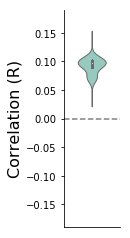

In [261]:
# plt.figure(figsize=(1.2,4), facecolor='white')

fig = plt.figure()
ax = fig.add_subplot(111)

fig.set_figheight(4)
fig.set_figwidth(1)


sns.violinplot(data=log_scores[sig_idx,6],  palette="Set3", bw=.7, cut=6, linewidth=1 )
plt.hlines(0,-.8,.8, linestyle='--', color='grey')
plt.xlim(-.8,.8)
plt.ylim(-.19,.19)

plt.ylabel('Correlation (R)', fontsize=16)
plt.xticks([])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


plt.savefig('../Figures/dom_freq_param_corr.pdf', bbox_inches='tight')